In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'September 2018'

<h2>Основная таблица</h2>

In [12]:
#rep_2017 = report['2017':]
rep_2018 = report['2018':] # данные за 2018 год
rep_2018

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-01-31     2477   1881         32   5   0     1     74     136      12
2018-02-28     2527   1625         44   7   0     3    121     130      16
2018-03-31     2568   1997         51   6   0    10     79     197      12
2018-04-30     2359   2410         74   5   0     1     56     129       9
2018-05-31     2166   2355         65   4   0     1     42     131      12
2018-06-30     2361   2369         32   3   0     7     64     150      17
2018-07-31     2435   2513         69   1   0     7     51     184       7
2018-08-31     2637   2437         59   1   0     5    115     161       9
2018-09-30     2591   2343         85   4   0     2     84     134       9

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [9]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-09-30      -46    -94         26   3   0    -3    -31     -27       0

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

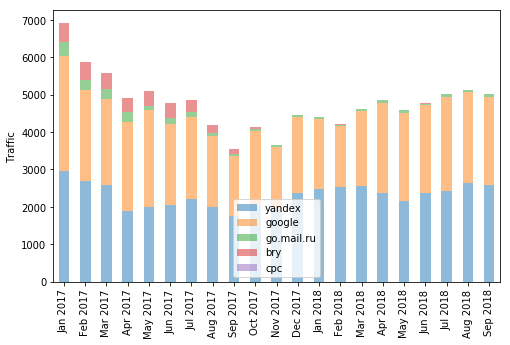

In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

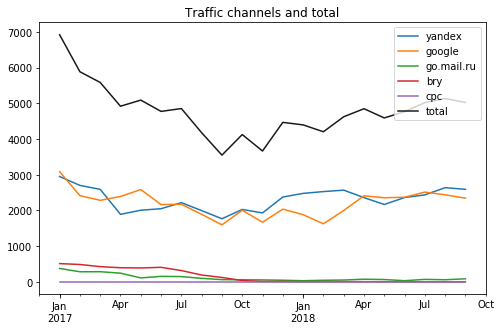

In [11]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [13]:
kw = 'keyword visit'.split()

In [14]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
go.mail.ru 0                                             (not set)     85
google     0                                         дешевые двери    271
           1                                          двери дешево    227
           2                                       двери из дерева    190
           3                             np - /?cnt=catalog&r=2438    110
           4                             np - /?cnt=catalog&r=1428     90
           5                                      np - /?pid=pokaz     65
           6                                         двери продажа     65
           7                                                np - /     48
           8                                дверные полотна купить     23
           9                                дверное полотно дешево     20
           10                                      полотна дверные     15
           11                                 np - /?pid=pricelist     13
           12                                    полотно для двери     10
           13                                   np - /?pid=contact      9
           14                            np - /?cnt=catalog&r=1462      6
           15                                      дверное полотно      5
           16                                        двери полотно      4
           17                            np - /?cnt=catalog&r=1010      3
           18                            np - /?cnt=catalog&r=3124      3
           19                             np - /?cnt=catalog&r=733      3
           20                              np - /?pid=menu-katalog      3
           21                                     двери с коробкой      3
           22                             np - /?cnt=catalog&r=114      2
           23                            np - /?cnt=catalog&r=1709      2
           24                            np - /?cnt=catalog&r=1792      2
           25                            np - /?cnt=catalog&r=1935      2
           26                            np - /?cnt=catalog&r=1959      2
           27                             np - /?cnt=catalog&r=448      2
           28                             np - /?cnt=catalog&r=473      2
...                                                            ...    ...
yandex     2425  сколько стоит кастораме пенал двух дверей для ...      1
           2426  сколько стоит поменять стекло в двери кухонной...      1
           2427  стандартный размер дверного полотна межкомнатн...      1
           2428  стеклянная дверь в кухню рисунки на дверях 43 ...      1
           2429        стеклянные двери на кухню в деревянном доме      1
           2430      стринги нити на дверной проем купить в москве      1
           2431                     су 14 дверной интернет магазин      1
           2432  таблица соотношения размеров проема и рекоменд...      1
           2433     термопленка на дверь для кухни купить в москве      1
           2434  товары мерлен двери полотно дверное глухое alt...      1
           2435  товары мерлен двери полотно дверное глухое бер...      1
           2436                    толщина дверного полотна дориан      1
           2437  у нас на кухне разбилось стекло хотим заменить...      1
           2438                  убрали дверь на кухню как вернуть      1
           2439  увидеть паука вечером на кухне ползущего вверх...      1
           2440  увидеть паука вечером на кухне ползущего вверх...      1
           2441  увидеть паука на кухне ползущего по притолоки ...      1
           2442  фартук для кухни из стекла каталог фото стекля...      1
           2443                      фурнитура для дверей кухонных      1
           2444  хочу на кухне в п44 раковину и посудомойку спр...      1
           2445  цвет двери ral 7004 каталог цветов ral кухонны...      1
           2446  цветной дверной проем дверные арочные проемы к...      1
           2447                что лучше эмаль или шпон для две

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [15]:
data[kw].xs(0, level=1)

,keyword,visit
go.mail.ru,(not set),85
google,дешевые двери,271
rambler,Дверь вимона до белёный дуб 600 остатки 2012 года,1
yahoo,np - /?cnt=catalog&r=197,1
yandex,(not set),63


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [16]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
go.mail.ru 0                                           (not set)     85
google     0                                       дешевые двери    271
           1                                        двери дешево    227
           2                                     двери из дерева    190
           3                           np - /?cnt=catalog&r=2438    110
           4                           np - /?cnt=catalog&r=1428     90
rambler    0   Дверь вимона до белёный дуб 600 остатки 2012 года      1
           1   Дверь вимона до белёный дуб 600 остатки 2012 г...      1
           2                Дверь вимона до муза белёный дуб 600      1
yahoo      0                            np - /?cnt=catalog&r=197      1
yandex     0                                           (not set)     63
           1                     Интернет-магазин дверей Тук-тук      6
           4   купить дверное полотно дешево в москве с доста...      5
           10                               двери купе для кухни      3
           9                         арка в дверной проем купить      3